[View in Colaboratory](https://colab.research.google.com/github/Sherbhy/Python-mini-projects/blob/master/Mobile_Price_Classification.ipynb)

In [12]:
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#@title Default title text
from google.colab import files
import pandas as pd

In [13]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train.csv" with length 122403 bytes


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
from sklearn import datasets, svm, tree
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
df = pd.read_csv('train.csv')
num_rows = df.shape[0]
y = df['price_range']
del df['price_range']

In [0]:
x = df.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_std,y, test_size=0.2)

In [0]:
#Classifier
svc = svm.SVC()
parameters = {'kernel':('linear','rbf'), 'C':[1,10]}
clf=GridSearchCV(svc,parameters)
model = clf.fit(X_train,y_train)

Score: 0.97


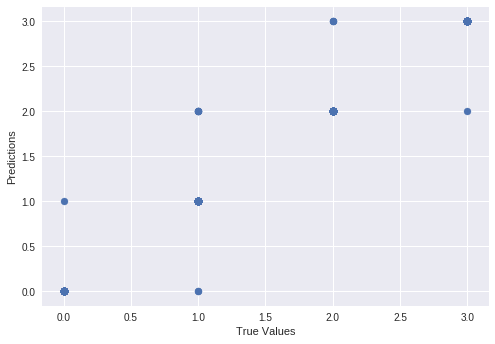

In [158]:
pred=clf.predict(X_test)
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print ("Score:", model.score(X_test, y_test))

In [159]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [160]:
files.upload()

Saving test.csv to test (3).csv


{'test.csv': b'id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi\r\n1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0\r\n2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0\r\n3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1\r\n4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0\r\n5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1\r\n6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1\r\n7,1718,0,2.4,0,1,0,47,1,156,2,3,1283,1374,3873,14,2,10,0,0,0\r\n8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1\r\n9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0\r\n10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1\r\n11,1500,0,2.2,0,2,0,55,0.6,80,7,6,503,1336,3866,13,7,20,0,1,0\r\n12,1343,0,2.9,0,2,1,34,0.8,171,3,6,235,1671,3911,15,8,8,1,1,1\r\n13,900,1,1.4,1,0,0,30,1,87,2,3,829,1893,439,6,2,2

In [161]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98        91
          1       0.99      0.93      0.96       106
          2       0.94      0.97      0.96       105
          3       0.97      0.99      0.98        98

avg / total       0.97      0.97      0.97       400



In [162]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[ 90   1   0   0]
 [  2  99   5   0]
 [  0   0 102   3]
 [  0   0   1  97]]


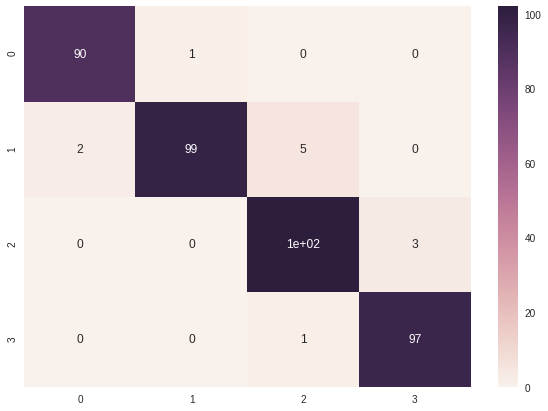

In [163]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [164]:
data_test=pd.read_csv('test.csv')
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [180]:
data_test=data_test.drop('id',axis=1)

ValueError: ignored

In [179]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [181]:
predicted_price=clf.predict(data_test)

ValueError: ignored

In [0]:
submission = pd.DataFrame(predicted_price)

In [183]:
submission.head()

,0
0,3
1,3
2,3
3,3
4,3


In [0]:
submission.to_csv('result.csv')

In [0]:
files.download('result.csv')